For this project I decided to focus specifically on Nigeria’s COVID-19 data because it gives a clearer picture of the pandemic timeline for a single country. I started from the full OWID dataset (owid-covid-data.csv), which contains daily COVID-19 indicators for many locations, and then filtered it down to Nigeria only. I converted the date column to datetime and sorted the rows by date so that summaries and visualizations behave correctly.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the full OWID dataset
owid = pd.read_csv("owid-covid-data.csv")

# Make sure the date is a datetime
owid["date"] = pd.to_datetime(owid["date"])

# Keep only actual countries (3-letter ISO codes)
owid_countries = owid[owid["iso_code"].str.len() == 3].copy()

# Focus on Nigeria
country = "Nigeria"
country_data = (
    owid_countries[owid_countries["location"] == country]
    .sort_values("date")
    .copy()
)

country_data.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
273837,NGA,Africa,Nigeria,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,10.8,41.95,NaN,54.69,0.54,218541216,NaN,NaN,NaN,NaN
273838,NGA,Africa,Nigeria,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,10.8,41.95,NaN,54.69,0.54,218541216,NaN,NaN,NaN,NaN
273839,NGA,Africa,Nigeria,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,10.8,41.95,NaN,54.69,0.54,218541216,NaN,NaN,NaN,NaN
273840,NGA,Africa,Nigeria,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,10.8,41.95,NaN,54.69,0.54,218541216,NaN,NaN,NaN,NaN
273841,NGA,Africa,Nigeria,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,10.8,41.95,NaN,54.69,0.54,218541216,NaN,NaN,NaN,NaN


From the full OWID dataset, I filtered down to Nigeria only. Now `country_data` has one row per day for Nigeria and many columns describing that day’s COVID-19 situation.

To summarize and visualize the data, I picked two features that have values on almost all days and relate to the pandemic indicators discussed in the paper:

- `total_cases_per_million` – cumulative number of confirmed cases per million people.
- `new_deaths_per_million` – number of new deaths per million people per day.


In [11]:
country_data.shape


(1674, 67)

Now that I know how many rows I'm working with, I can focus on two features that give a meaningful view of Nigeria’s pandemic experience:

- **people_fully_vaccinated_per_hundred** — how vaccination progressed
- **new_deaths_per_million** — how severe daily mortality was

Before summarizing them, I expect vaccination to remain low for a while because Nigeria’s rollout started later, and I expect deaths per million to stay close to zero with occasional spikes.


In [12]:
cases_desc = country_data["total_cases_per_million"].describe()
deaths_desc = country_data["new_deaths_per_million"].describe()

cases_desc, deaths_desc


(count    1674.000000
 mean      868.823769
 std       426.847073
 min         0.000000
 25%       679.150000
 50%      1145.630000
 75%      1195.040000
 max      1197.340000
 Name: total_cases_per_million, dtype: float64,
 count    1674.000000
 mean        0.008411
 std         0.047437
 min         0.000000
 25%         0.000000
 50%         0.000000
 75%         0.000000
 max         0.720000
 Name: new_deaths_per_million, dtype: float64)

The summary for `total_cases_per_million` shows how case counts build up over time, with the minimum near zero and the maximum reflecting the final cumulative burden by the end of the period. The summary for `new_deaths_per_million` has a very low mean but a higher maximum and standard deviation, which suggests that most days have few or no deaths but there are clear spikes during waves.

These numbers match the general pattern of Nigeria’s COVID-19 experience: many relatively quiet days with some periods of higher transmission and mortality.


To see how the pandemic evolved in Nigeria, I plotted `total_cases_per_million` over time. This uses every daily observation, so the curve is smooth and not sparse.
    

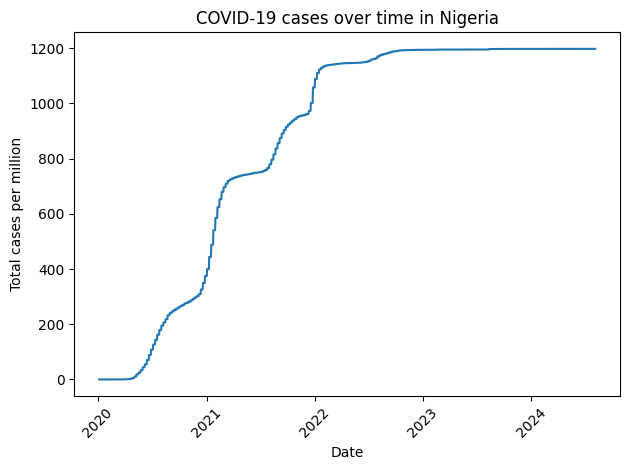

In [13]:
plt.figure()
plt.plot(country_data["date"],
         country_data["total_cases_per_million"])

plt.xlabel("Date")
plt.ylabel("Total cases per million")
plt.title(f"COVID-19 cases over time in {country}")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The plot shows a steadily rising curve for `total_cases_per_million` in Nigeria. The flat sections represent periods with few new cases, and steeper sections represent waves where cases were increasing faster. Because this is a cumulative measure, it never goes down, which makes it easy to see the overall growth of the pandemic over the full time period.


For a second visualization, instead of staying with just Nigeria, I used the full OWID data set to make a global snapshot. On one reference date, each point in the scatter plot represents a country.

- The x-axis is `gdp_per_capita` (economic development).
- The y-axis is `people_fully_vaccinated_per_hundred` (vaccination coverage).

This creates a dense plot with many points, which makes patterns across countries much easier to see.


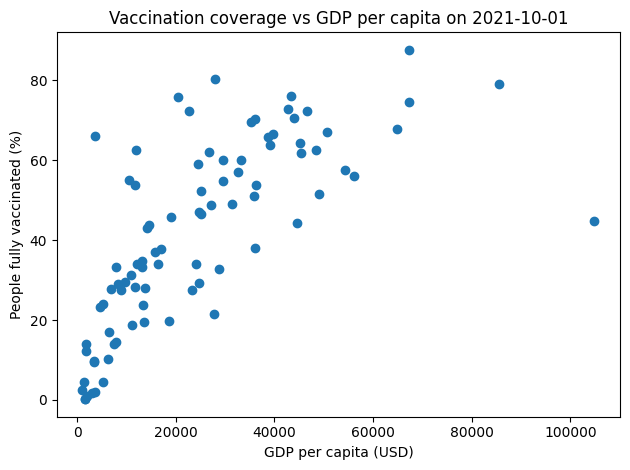

In [14]:
ref_date = "2021-10-01"

# Take all countries on the reference date
snapshot = owid_countries[owid_countries["date"] == ref_date].copy()

# Drop rows with missing vaccination or GDP data
snapshot = snapshot.dropna(subset=["people_fully_vaccinated_per_hundred",
                                   "gdp_per_capita"])

plt.figure()
plt.scatter(snapshot["gdp_per_capita"],
            snapshot["people_fully_vaccinated_per_hundred"])

plt.xlabel("GDP per capita (USD)")
plt.ylabel("People fully vaccinated (%)")
plt.title(f"Vaccination coverage vs GDP per capita on {ref_date}")
plt.tight_layout()
plt.show()


In this scatter plot, each point is one country on 2021-10-01:

- The x-axis sample is that country’s `gdp_per_capita`.
- The y-axis sample is that country’s `people_fully_vaccinated_per_hundred`.

Richer countries tend to cluster toward the upper-right, with higher GDP per capita and higher vaccination coverage. Many lower-income countries appear toward the lower-left, with both lower GDP and lower vaccination levels. This visually supports the idea from the paper that vaccine rollout has been unequal across the world, with higher-income countries generally reaching higher coverage sooner.
